# Метод решающих деревьев для определения марки вина
### Проанализируем ошибку классификации (долю неверно классифицированных объектов) на тестовой выборке. Не имеет смысла считать ошибку на обучающей выборке - в силу алгоритма обучения решающих деревьев она всегда равна нулю. 

In [54]:
from sklearn import tree
from milksets import wine
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
features, labels = wine.load()

means, squares = [], []
for a in range(1, len(labels)//2):
    test_accs = []
    for i in range(50):
        perm_features, perm_labels = shuffle(features, labels)
        train_features, train_labels = perm_features[:a], perm_labels[:a]
        test_features, test_labels = perm_features[a:], perm_labels[a:]
        
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(train_features, train_labels)

        test_answer = clf.predict(test_features)
        test_accs.append(1-accuracy_score(test_labels, test_answer))
    acc_mean =np.mean(test_accs)
    means.append(acc_mean)
    sq_err = 0
    for i in range(len(test_accs)):
        sq_err += (test_accs[i]-acc_mean)**2
    squares.append(np.sqrt(sq_err)/(len(test_accs)-1))
    
    

#features, labels = shuffle(features, labels, random_state = 0)
#print(features.shape,labels.shape)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


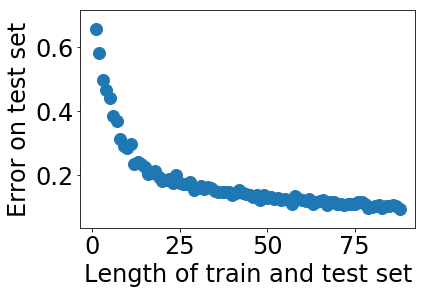

In [55]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.xlabel('Length of train and test set')
plt.ylabel('Error on test set')
plt.scatter(x = range(1, len(labels)//2), y = means)
plt.show()


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


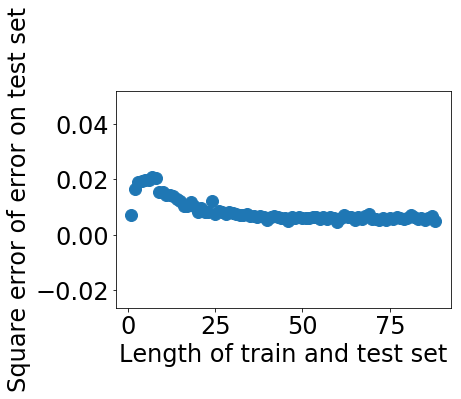

In [56]:
plt.xlabel('Length of train and test set')
plt.ylabel('Square error of error on test set')
plt.scatter(x = range(1, len(labels)//2), y = squares)
plt.show()

##### Как мы видим, ошибка классификации убывает с ростом размера выборок, а ее среднеквадратичное отклонение остается примерно постоянным с некоторого момента, что обосновывает пригодность модели.